1. Implementacja algorytmu kNN.

In [1]:
import numpy as np
from statistics import multimode

# X_train, X_test - pandas data frame
# y_train - one or two dimensional numpy array or pd.Series object

def knn(X_train, y_train, X_test, k_nearest_neighbours, p=2):
    def minkowski_metric(x, y, p):
        if p == float("inf"):
            return np.max(np.abs(x - y))
        return np.sum(np.power(np.abs(x - y), p)) ** (1 / p)

    def find_mode(lst):
        try:
            return np.random.choice(np.array(multimode(lst)))
        except ValueError:
            return float("NaN")

    # Sprawdzenie typów zmiennych
    try:
        if isinstance(y_train, pd.Series):
            y_train = y_train.to_numpy()
        if y_train.ndim == 2:
            y_train = y_train.flatten()
    except:
        print("y_train must be a one or two dimensional numpy array or pd.Series object")
        raise TypeError

    # Algorytm
    neighbors = []
    for i in range(len(X_test)):
        try:
            distances = X_train.apply(lambda x: minkowski_metric(x, X_test.iloc[i], p), axis=1).to_numpy()
            order_of_distances = np.argsort(distances)
            y_sorted = y_train[order_of_distances]
            neighbors.append(y_sorted[:k_nearest_neighbours])

        except TypeError:
            print(f"Observation {i} cannot be handled. Wrong type - all values must be numeric.")
            neighbors.append([])
            continue
        except AttributeError:
            print("X_train and X_test must be pd.DataFrame objects.")
            raise

    return np.array(list(map(find_mode, neighbors)))

2. Wczytywanie i tworzenie zbiorów testowych na R^2, a także sprawdzenie dla 1-nn.

In [2]:
import numpy as np
import pandas as pd
np.random.seed(100)
n = 200
p = 2
beta_0 = 1
beta_1 = np.array([2, 1])
X = np.random.normal(0, 1, size = (n, p))
Xbeta = X@beta_1+beta_0
probs = np.exp(Xbeta)/(1+np.exp(Xbeta)) 
y = np.random.binomial(1, probs)
X = pd.DataFrame(X)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 100)
for p in [1, 2, float("inf")]:
    zgodnosc_zbioru = (knn(X_train=X_train, X_test = X_train, y_train = y_train, k_nearest_neighbours= 1, p=p) == y_train)
    accuracy = np.sum(zgodnosc_zbioru) / np.shape(zgodnosc_zbioru)[0]
    print(f"Accuracy zbioru symulacyjnego z p={p}: {accuracy}.")

Accuracy zbioru symulacyjnego z p=1: 1.0.
Accuracy zbioru symulacyjnego z p=2: 1.0.
Accuracy zbioru symulacyjnego z p=inf: 1.0.


In [111]:
import pandas as pd
pima = pd.read_csv("https://raw.githubusercontent.com/kozaka93/2023Z-MachineLearning/main/labs/lab10/pima.csv")
pima = pima[["DiabetesPedigreeFunction", "BloodPressure", "Outcome"]].iloc[0:400]
pima = pima.drop_duplicates()
X_pima = pima[["DiabetesPedigreeFunction", "BloodPressure"]]
y_pima = pima["Outcome"]
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(X_pima, y_pima, test_size= 0.3, random_state= 100)

for p in [1, 2, float("inf")]:
    zgodnosc_zbioru = (knn(X_train=X_pima_train, X_test = X_pima_train, y_train = y_pima_train, k_nearest_neighbours= 1, p=p) == y_pima_train.to_numpy())
    accuracy = round(np.sum(zgodnosc_zbioru) / np.shape(zgodnosc_zbioru)[0], 3)
    print(f"Accuracy zbioru pima z p={p}: {accuracy}.")

Accuracy zbioru pima z p=1: 1.0.
Accuracy zbioru pima z p=2: 1.0.
Accuracy zbioru pima z p=inf: 1.0.


In [110]:
X_pd1 = pd.read_csv("https://raw.githubusercontent.com/kozaka93/2023Z-MachineLearning/main/homeworks/PD1/X.csv")
X_pd1 = X_pd1.iloc[:200, :2]
y_pd1 = pd.read_csv("https://raw.githubusercontent.com/kozaka93/2023Z-MachineLearning/main/homeworks/PD1/y.csv")
y_pd1 = np.array(y_pd1.iloc[:200])
X_pd1_train, X_pd1_test, y_pd1_train, y_pd1_test = train_test_split(X_pd1, y_pd1, test_size= 0.3, random_state= 100)

for p in [1, 2, float("inf")]:
    zgodnosc_zbioru = (knn(X_train=X_pd1_train, X_test = X_pd1_train, y_train = y_pd1_train, k_nearest_neighbours= 1, p=p) == y_pd1_train.flatten())
    accuracy = round(np.sum(zgodnosc_zbioru) / np.shape(zgodnosc_zbioru)[0], 3)
    print(f"Accuracy zbioru z pierwszej pracy domowej z p={p}: {accuracy}.")



Accuracy zbioru z pierwszej pracy domowej z p=1: 1.0.
Accuracy zbioru z pierwszej pracy domowej z p=2: 1.0.
Accuracy zbioru z pierwszej pracy domowej z p=inf: 1.0.


3. Testy

3.A Dokładność

In [40]:
def get_acc_scores(X_train, X_test, y_train, y_test):
    wyniki = {}
    for p in [1, 2, float("inf")]:
        wyniki[p] = []
        for k in [3, 4, 5, 7, 10, 12, 14, 17, 20, 25, 30]:
            zgodnosc_zbioru = (knn(X_train=X_train, X_test = X_test, y_train = y_train, k_nearest_neighbours= k, p=p) == y_test)
            accuracy = round(np.sum(zgodnosc_zbioru) / np.shape(zgodnosc_zbioru)[0], 3)
            wyniki[p].append(accuracy)
    return wyniki


In [41]:
pima_wyniki = get_acc_scores(X_pima_train, X_pima_test, y_pima_train, y_pima_test.to_numpy())
pd1_wyniki = get_acc_scores(X_pd1_train, X_pd1_test, y_pd1_train, y_pd1_test.flatten())
symulacyjny_wyniki = get_acc_scores(X_train, X_test, y_train, y_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


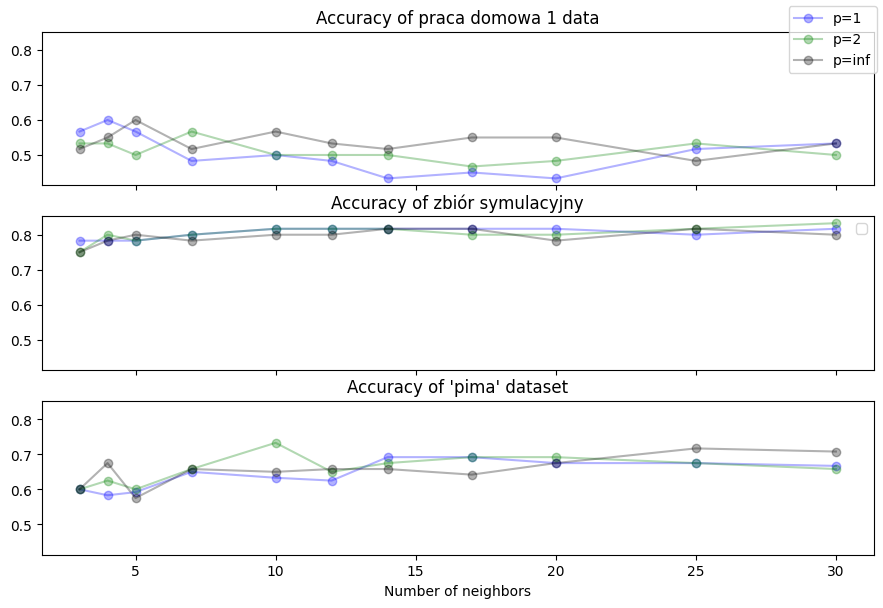

In [66]:
import matplotlib.pyplot as plt

k_vals = [3, 4, 5, 7, 10, 12, 14, 17, 20, 25, 30]

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title("Accuracy of praca domowa 1 data")
ax1.plot(k_vals, pd1_wyniki[1], 'o-', color='blue', alpha=0.3,label="p=1")
ax1.plot(k_vals, pd1_wyniki[2], 'o-', color='green', alpha=0.3, label="p=2")
ax1.plot(k_vals, pd1_wyniki[float("inf")],'o-', color='black', alpha=0.3, label="p=inf")

ax2.set_title("Accuracy of zbiór symulacyjny")
ax2.plot(k_vals, symulacyjny_wyniki[1], 'o-', color='blue', alpha=0.3)
ax2.plot(k_vals, symulacyjny_wyniki[2], 'o-', color='green', alpha=0.3)
ax2.plot(k_vals, symulacyjny_wyniki[float("inf")],'o-', color='black', alpha=0.3)
ax2.legend()

ax3.set_title("Accuracy of 'pima' dataset")
ax3.plot(k_vals, pima_wyniki[1], 'o-', color='blue', alpha=0.3)
ax3.plot(k_vals, pima_wyniki[2], 'o-', color='green', alpha=0.3)
ax3.plot(k_vals, pima_wyniki[float("inf")],'o-', color='black', alpha=0.3)
ax3.set_xlabel("Number of neighbors")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)

fig.subplots_adjust(left=-0.3, bottom=None, right=1, top=1.2, wspace=None, hspace=None)
plt.show()

3.B Czułość

In [80]:
def get_recall_scores(X_train, X_test, y_train, y_test):
    wyniki = {}
    for p in [1, 2, float("inf")]:
        wyniki[p] = []
        for k in [3, 4, 5, 7, 10, 12, 14, 17, 20, 25, 30]:
            predicition = knn(X_train=X_train, X_test = X_test, y_train = y_train, k_nearest_neighbours= k, p=p)
            zgodnosc_zbioru = (predicition == y_test)
            true_positives = np.sum(np.logical_and(y_test, zgodnosc_zbioru))
            accuracy = round(true_positives/np.sum(y_test), 3)
            wyniki[p].append(accuracy)
    return wyniki


In [83]:
pima_wyniki_recall = get_recall_scores(X_pima_train, X_pima_test, y_pima_train, y_pima_test.to_numpy())
pd1_wyniki_recall = get_recall_scores(X_pd1_train, X_pd1_test, y_pd1_train, y_pd1_test.flatten())
symulacyjny_wyniki_recall = get_recall_scores(X_train, X_test, y_train, y_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


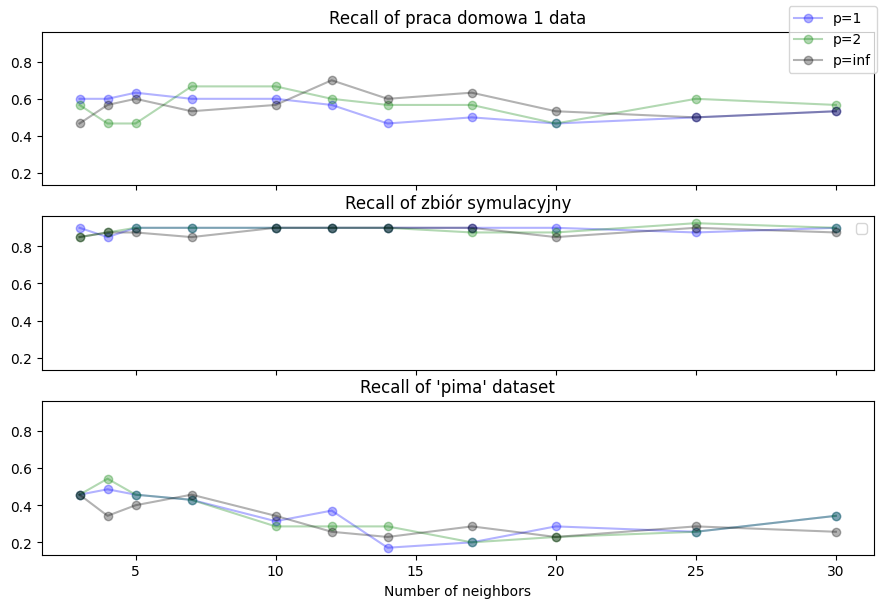

In [86]:
import matplotlib.pyplot as plt

k_vals = [3, 4, 5, 7, 10, 12, 14, 17, 20, 25, 30]

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title("Recall of praca domowa 1 data")
ax1.plot(k_vals, pd1_wyniki_recall[1], 'o-', color='blue', alpha=0.3,label="p=1")
ax1.plot(k_vals, pd1_wyniki_recall[2], 'o-', color='green', alpha=0.3, label="p=2")
ax1.plot(k_vals, pd1_wyniki_recall[float("inf")],'o-', color='black', alpha=0.3, label="p=inf")

ax2.set_title("Recall of zbiór symulacyjny")
ax2.plot(k_vals, symulacyjny_wyniki_recall[1], 'o-', color='blue', alpha=0.3)
ax2.plot(k_vals, symulacyjny_wyniki_recall[2], 'o-', color='green', alpha=0.3)
ax2.plot(k_vals, symulacyjny_wyniki_recall[float("inf")],'o-', color='black', alpha=0.3)
ax2.legend()

ax3.set_title("Recall of 'pima' dataset")
ax3.plot(k_vals, pima_wyniki_recall[1], 'o-', color='blue', alpha=0.3)
ax3.plot(k_vals, pima_wyniki_recall[2], 'o-', color='green', alpha=0.3)
ax3.plot(k_vals, pima_wyniki_recall[float("inf")],'o-', color='black', alpha=0.3)
ax3.set_xlabel("Number of neighbors")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)

fig.subplots_adjust(left=-0.3, bottom=None, right=1, top=1.2, wspace=None, hspace=None)
plt.show()

3.C Mierzenie czasu

In [137]:
import time
def get_times(X_train, X_test, y_train):
    wyniki = {}
    for p in [1, 2, 3]:
        wyniki[p] = []
        for k in [3, 10, 30, 90]:
            start = time.time()
            knn(X_train=X_train, X_test = X_test, y_train = y_train, k_nearest_neighbours= k, p=p)
            finish = time.time()
            wyniki[p].append(finish - start)
    return wyniki

In [138]:
times_symulacyjne = get_times(X_train, X_test, y_train)
times_pd1 = get_times(X_pd1_train, X_pd1_test, y_pd1_train)
times_pima = get_times(X_pima_train, X_pima_test, y_pima_train)

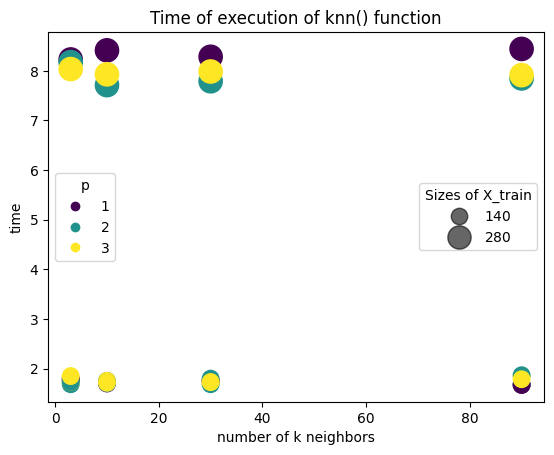

In [146]:
import matplotlib.pyplot as plt


k_vals = np.tile(np.array([3, 10, 30, 90]), 9)
time_vals = np.concatenate((np.array(times_pima[1] + times_pima[2]+times_pima[3]), np.array(times_pd1[1] + times_pd1[2]+times_pd1[3]), 
                            np.array(times_symulacyjne[1] + times_symulacyjne[2]+times_symulacyjne[3])), axis=None)
sizes = np.repeat(np.array([X_pima_train.shape[0], X_pd1_train.shape[0], X_train.shape[0]]),4*3 )
cols = np.tile(np.repeat(np.array([1, 2, 3]), 4), 3)
fig, ax = plt.subplots()
scatter = ax.scatter(k_vals, time_vals, c=cols, s=sizes)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center left", title="p")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="center right", title="Sizes of X_train")
ax.set_xlabel("number of k neighbors")
ax.set_ylabel("time")
ax.set_title("Time of execution of knn() function")
plt.show()